# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **SalePrice - the property's sale price in dollars. This is the target variable**

# Reading Data

In [ ]:
df = pd.read_csv("/content/house_train.csv")
df

# Data Overview

In [ ]:
df.info()

In [ ]:
df.describe()

# Univariate Analysis (Boxplot, Histogram, Violin Plot)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["SalePrice"])
plt.title("Boxplot of sale price")
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.title("Histogram of SalePrice")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["SalePrice"])
plt.title("Violin Plot of SalePrice")
plt.show()

## Data Cleaning

### Missing Values

In [273]:
Nulls = df.isnull().sum()
missing_values = Nulls[Nulls > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [278]:
missing_values = df.isnull().sum()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if (missing_values > 1000).any():
    columns_to_drop = missing_values[missing_values > 1000].index.tolist()
    df_numeric = df.drop(columns=columns_to_drop)
    print(f"Removed columns with high missing values: {columns_to_drop}")
elif not categorical_cols.empty:
    df = df.fillna(df.mode())
    df_filtered = df.dropna(subset=categorical_cols)
else:
    df = df.fillna(df.mean())
    print("Filled missing values with mean.")


Removed columns with high missing values: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
if

### Duplicates

In [ ]:
df.duplicated().sum()

### Ouliers

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [206]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [207]:

z_scores = np.abs(zscore(df_numeric))

threshold = 1.5

outliers_z = (z_scores > threshold)

df_z_filtered = df_numeric[~outliers_z.any(axis=1)]
df_z_filtered.shape

(194, 38)

In [208]:
for col in df_numeric.columns:
    outlier_values = df_numeric[col][outliers_z[col]]
    if not outlier_values.empty:
        print(f"Outliers in column {col}:")
        print(outlier_values.tolist())

Outliers in column Id:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460]
Outli

In [209]:
df_z_filtered

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
110,111,50,75.0,9525,6,4,1954,1972,0.0,444,...,182,0,0,0,0,0,0,10,2006,136900
117,118,20,74.0,8536,5,5,2006,2007,0.0,0,...,80,64,0,0,0,0,0,4,2007,155000
119,120,60,65.0,8461,6,5,2005,2006,0.0,0,...,0,24,0,0,0,0,0,7,2006,163990
123,124,120,55.0,7892,6,5,1993,1993,0.0,300,...,0,63,0,0,0,0,0,3,2008,153900
128,129,60,69.0,7590,6,5,1966,1966,266.0,512,...,188,108,0,0,0,0,0,7,2006,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1339,60,95.0,13450,7,5,2002,2002,0.0,700,...,146,91,0,0,0,0,0,6,2006,200000
1339,1340,20,120.0,9560,5,7,1972,1972,0.0,360,...,0,0,0,0,0,0,0,6,2006,128500
1341,1342,20,66.0,13695,6,5,2003,2004,0.0,814,...,0,78,0,0,0,0,0,7,2008,155000
1344,1345,60,85.0,11103,7,5,2006,2006,0.0,0,...,0,0,0,0,0,0,0,7,2007,155835


In [210]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df_numeric < (Q1 - 1.5 * IQR))| (df_numeric > (Q3 + 1.5 * IQR)).any(axis =1)

df_iqr_filtered = df_numeric[~outliers_iqr.any(axis=1)]

df_iqr_filtered.shape

(1341, 38)

In [211]:
for col in df_numeric.columns:
    outlier_values = df_numeric[col][outliers_iqr[col]]
    if not outlier_values.empty:
        print(f"Outliers in column {col}:")
        print(outlier_values.tolist())

Outliers in column LotFrontage:
[24.0, 21.0, 24.0, 24.0, 24.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 21.0, 21.0, 21.0, 24.0, 24.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 21.0, 21.0, 24.0, 24.0, 24.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 21.0, 21.0, 24.0, 21.0, 21.0]
Outliers in column LotArea:
[1300, 1477]
Outliers in column OverallQual:
[1, 1]
Outliers in column OverallCond:
[2, 3, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Outliers in column YearBuilt:
[1880, 1880, 1880, 1882, 1880, 1875, 1872]
Outliers in column TotalBsmtSF:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Outliers in column BedroomAbvGr:
[0, 0, 0, 0, 0, 0]
Outliers in column KitchenAbvGr:
[0]


In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

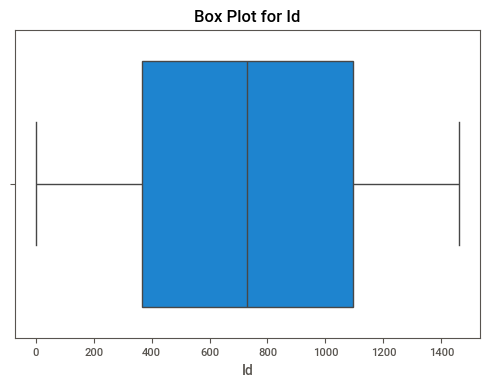

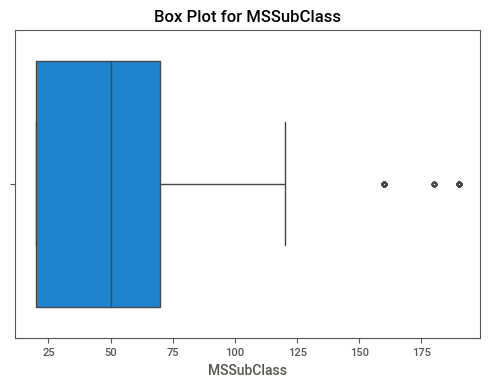

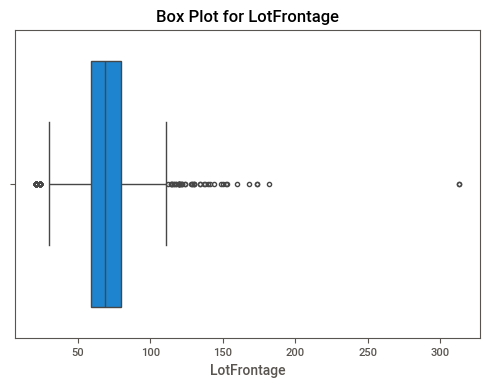

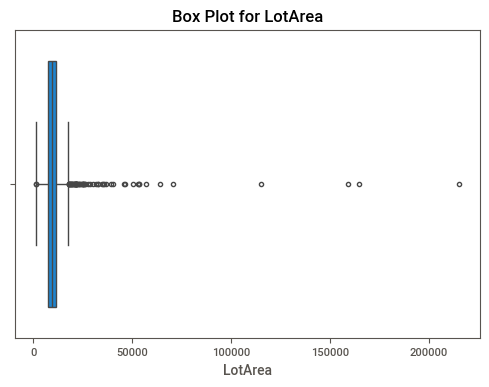

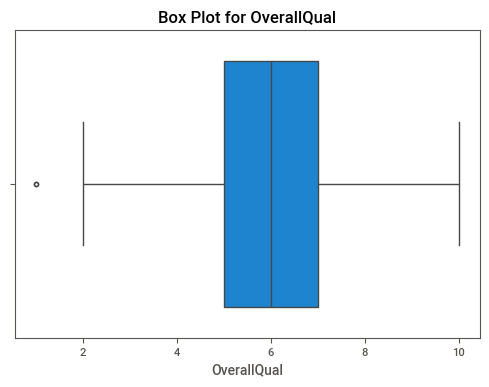

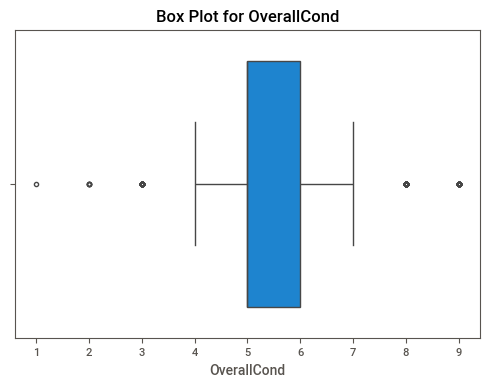

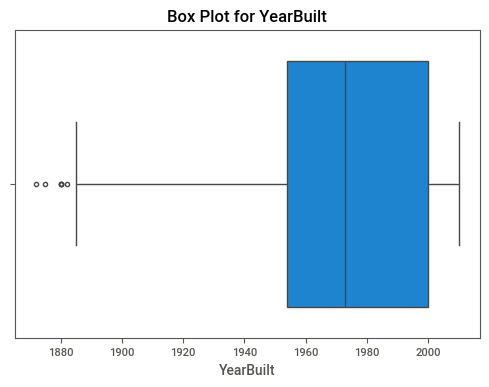

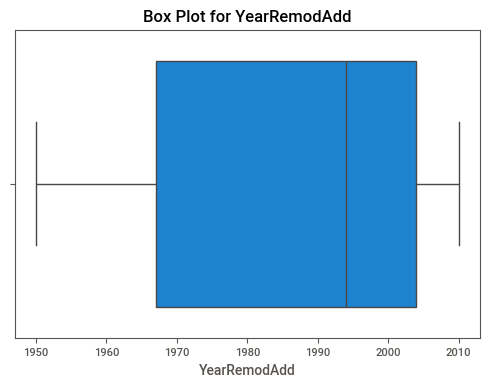

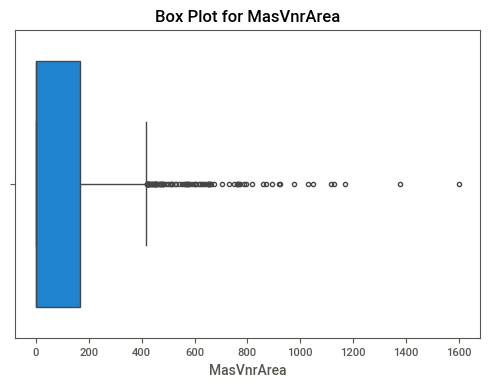

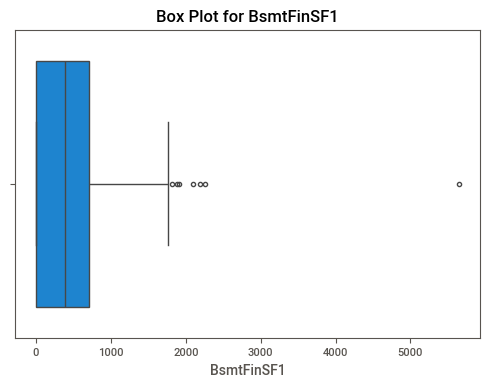

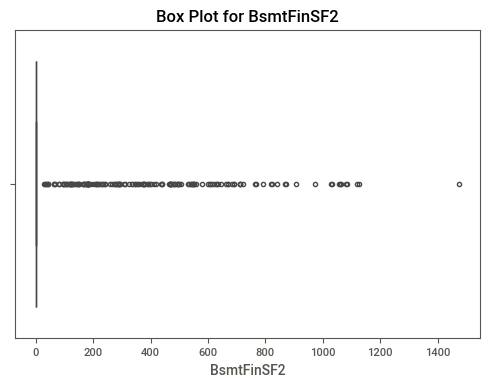

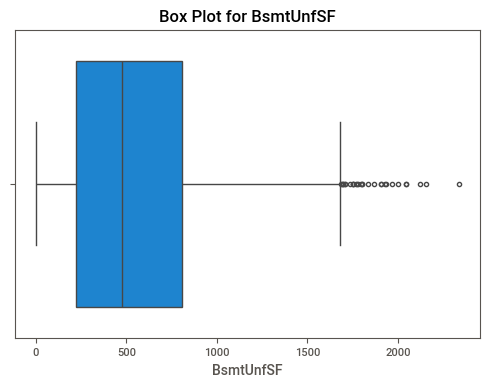

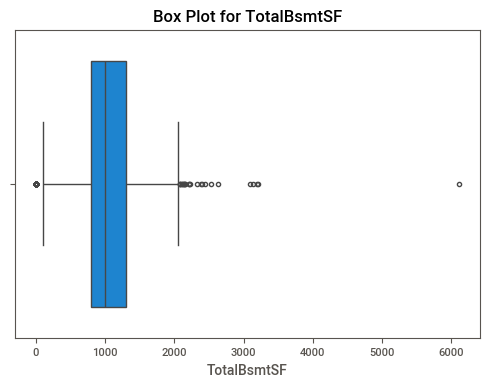

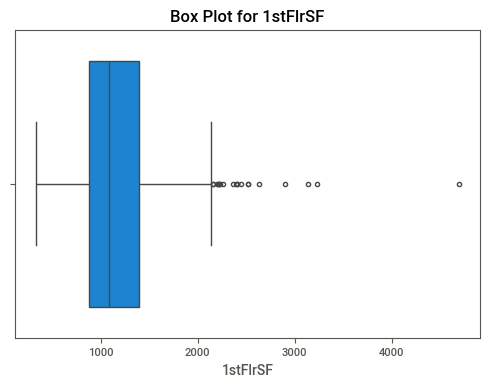

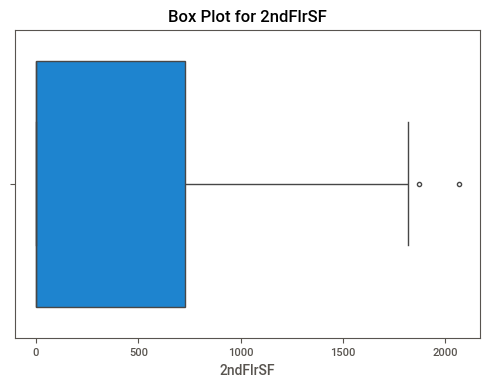

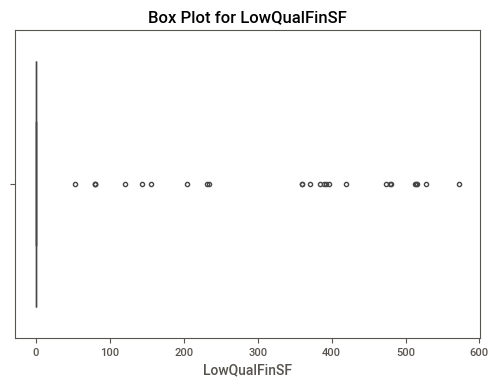

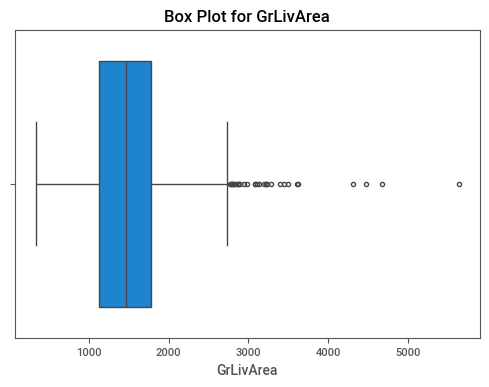

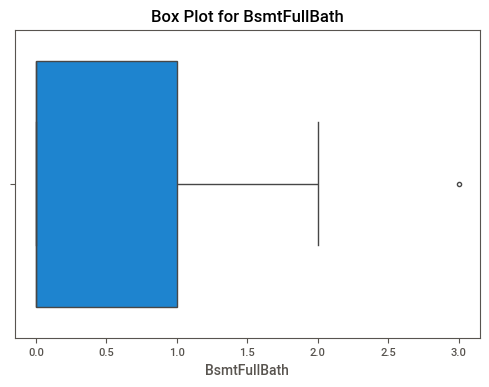

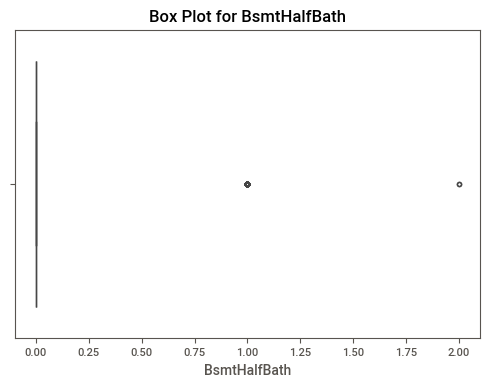

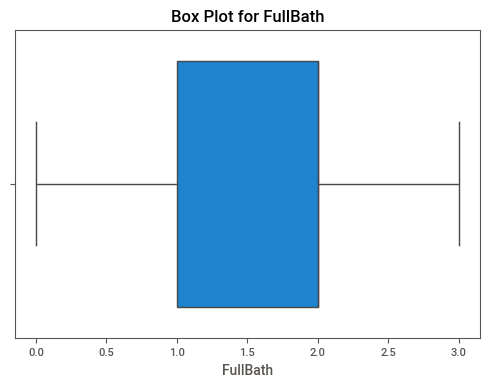

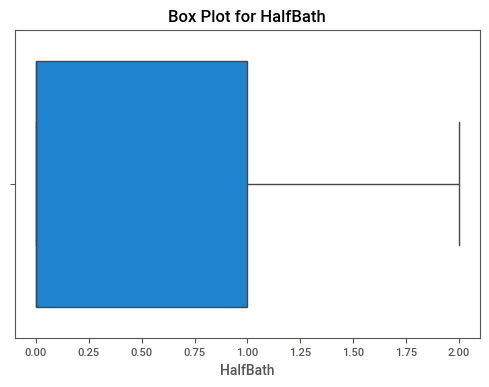

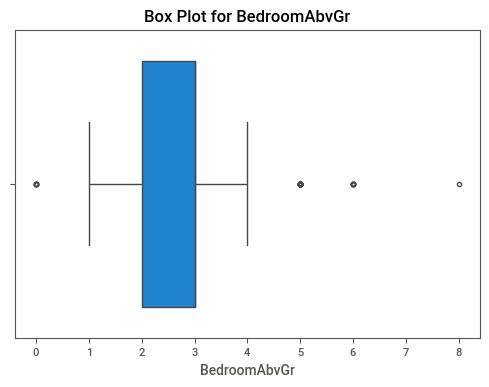

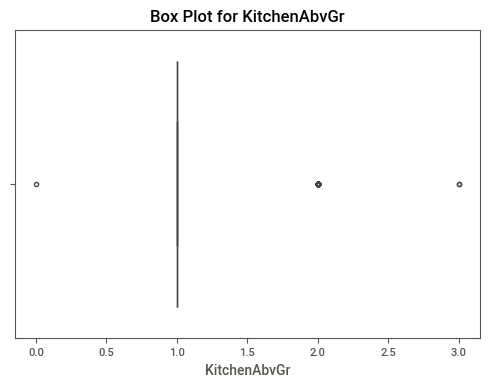

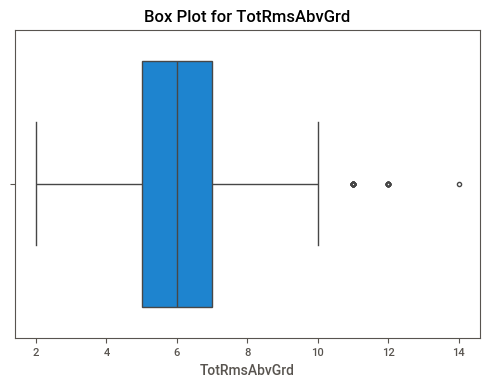

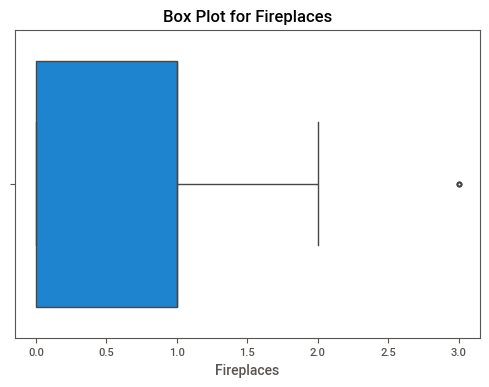

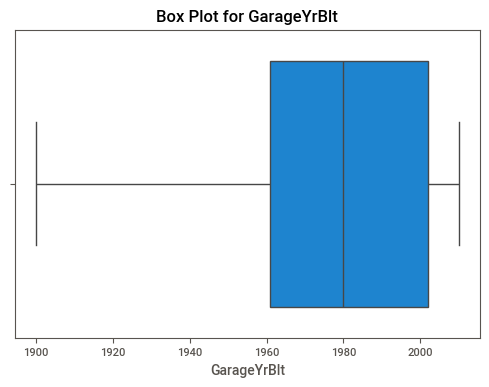

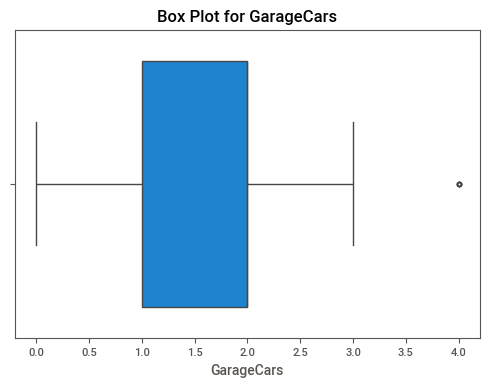

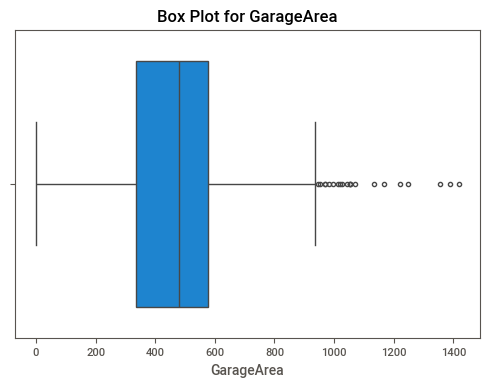

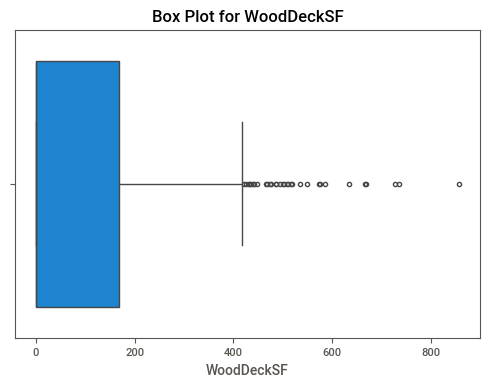

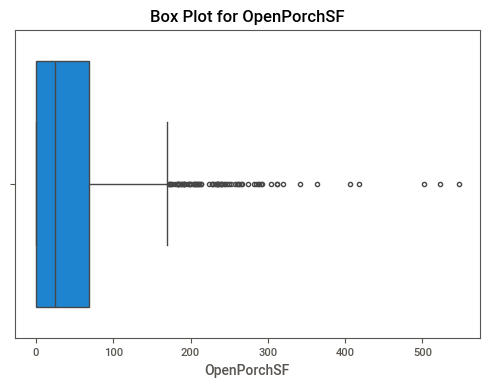

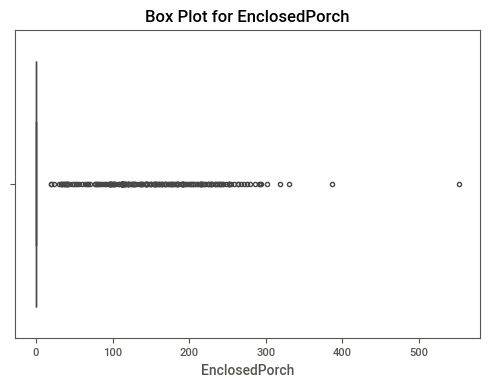

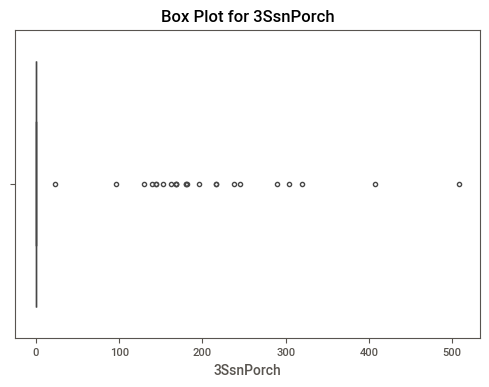

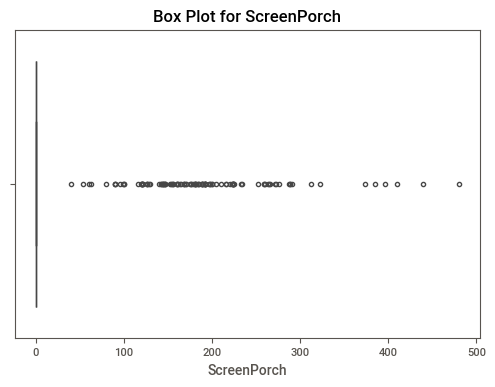

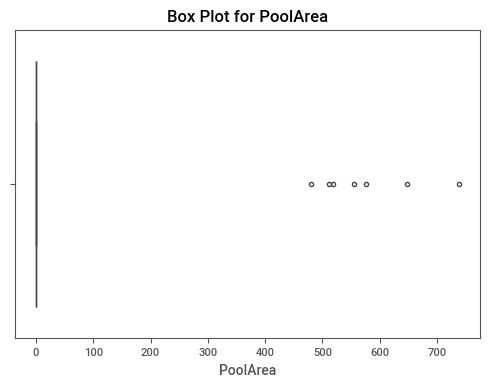

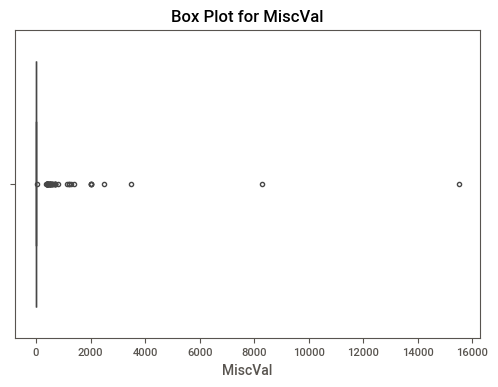

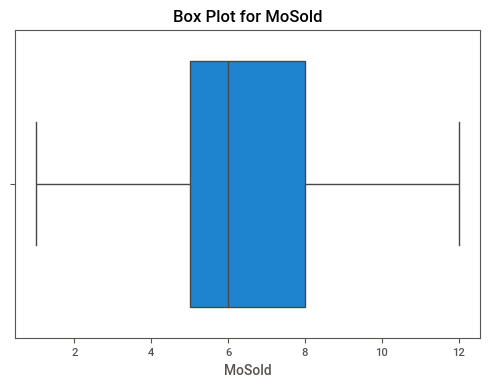

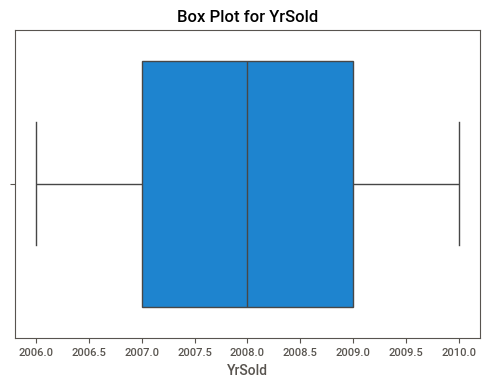

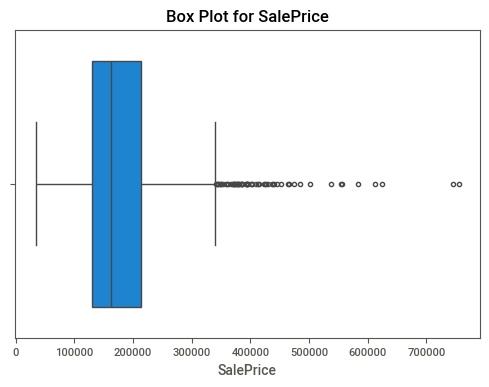

In [213]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

#### Compare between detecting outliers using Z-Score and IQR

### Is there a need to convert data types?

In [214]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


# Distrubtion Of Numerical Featuers

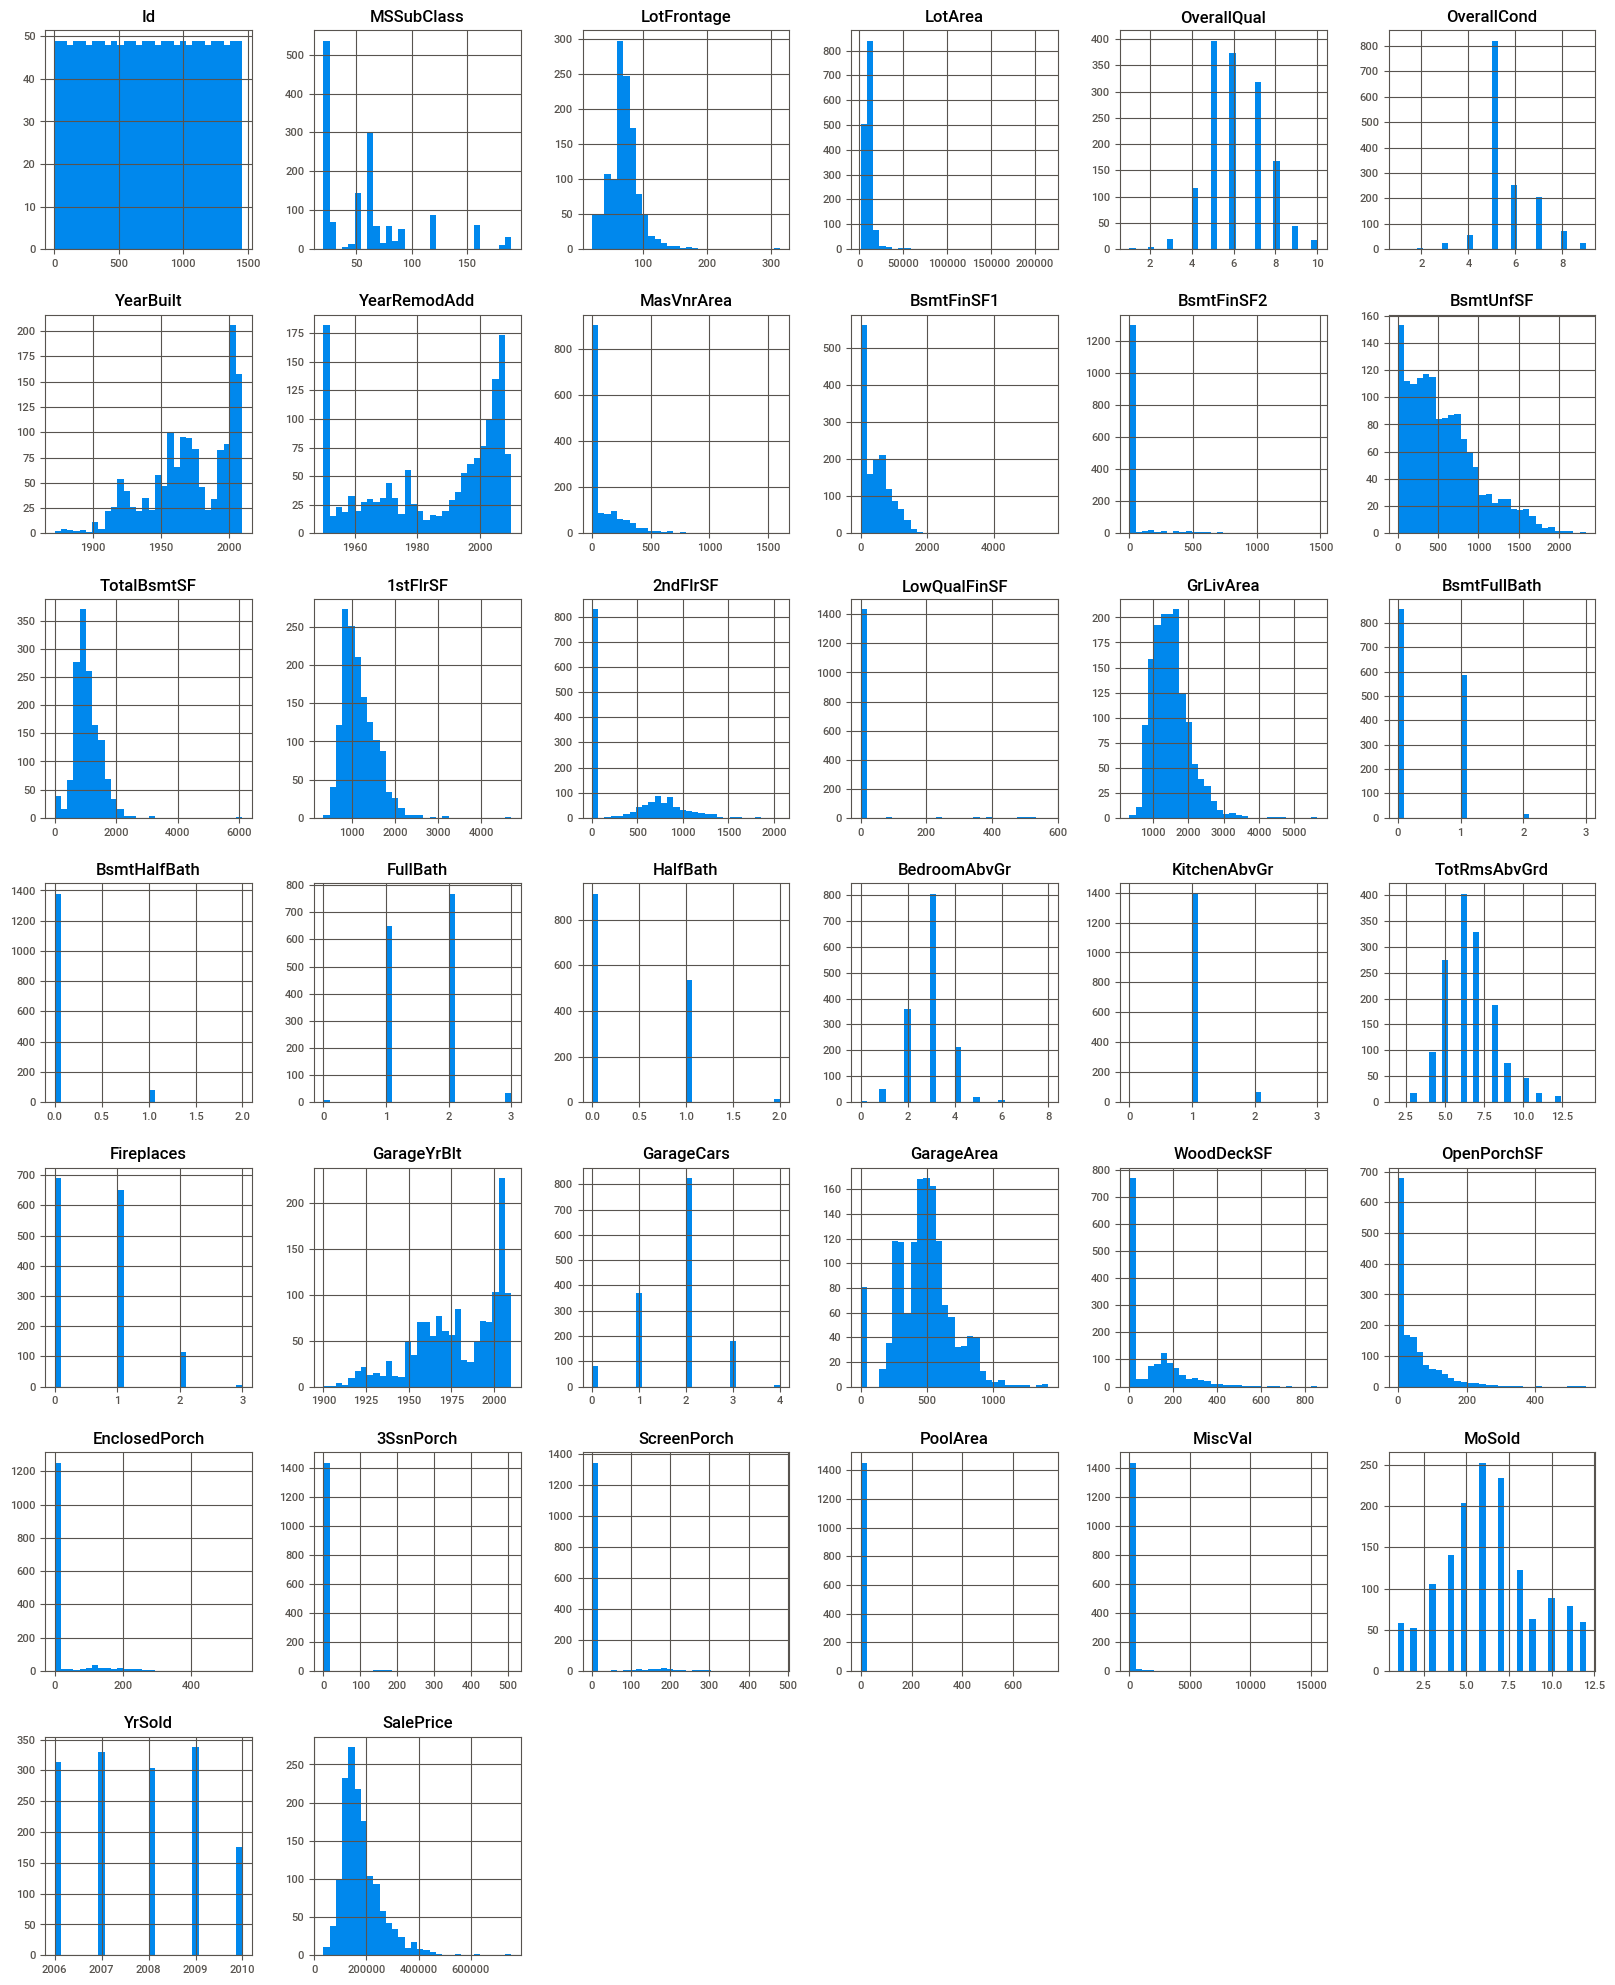

In [215]:
df_numeric.hist(figsize=(20, 25), bins=30)
plt.show()

# Target Value Distrubtion

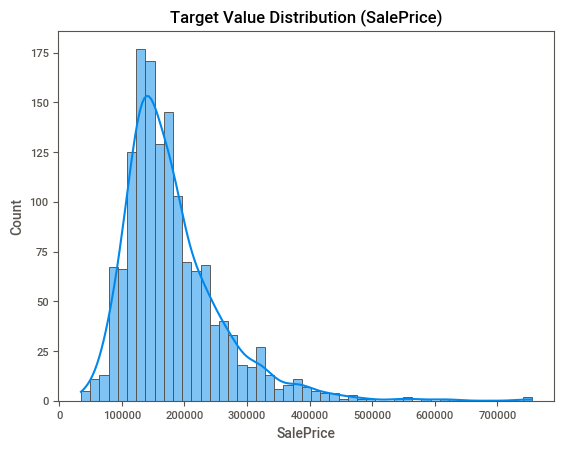

In [216]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Target Value Distribution (SalePrice)")
plt.show()


# Bivariate/Multivariate Analysis

## What are the correlations between numerical variables?

In [217]:
df_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


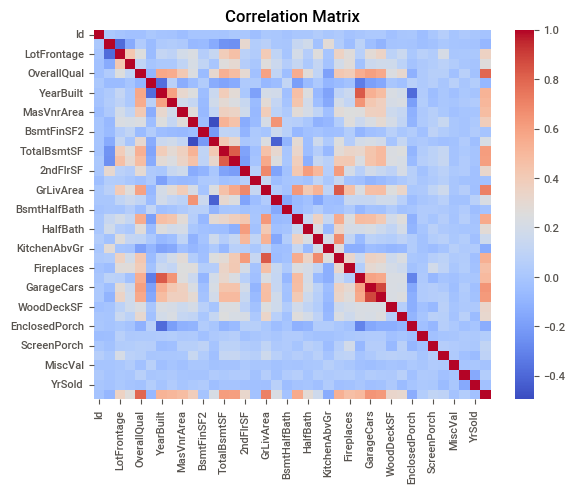

In [262]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix,  cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Compare btween calculate Correlation using Pearson and Spearman

In [263]:
pearson_corr = df_numeric.corr(method='pearson')
spearman_corr = df_numeric.corr(method='spearman')


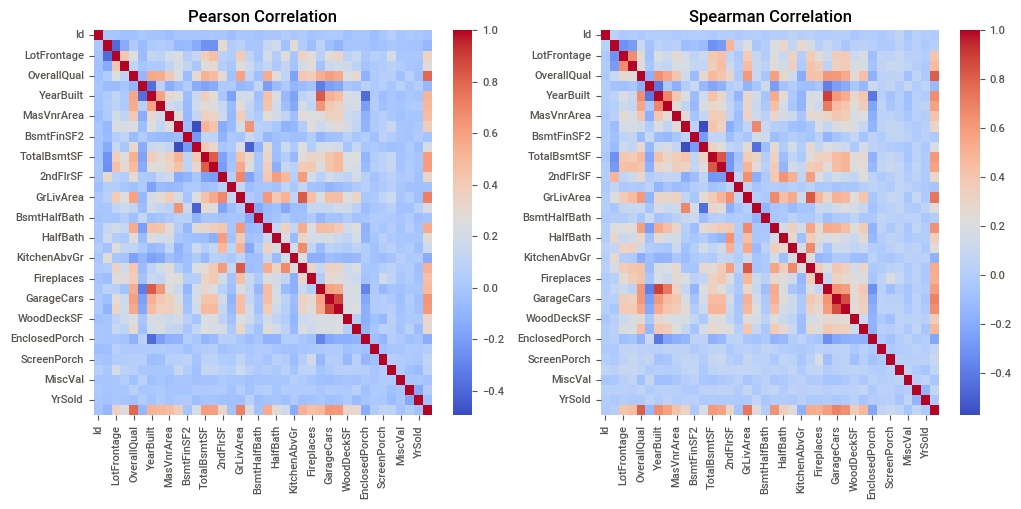

In [264]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(pearson_corr, ax=axes[0], cmap="coolwarm")
axes[0].set_title("Pearson Correlation")
sns.heatmap(spearman_corr, ax=axes[1], cmap="coolwarm")
axes[1].set_title("Spearman Correlation")
plt.show()


## What we should do about high corrleated featuers?

## What are the correlations between Featuers and Target Variable?

In [265]:
threshold = 0.8
features = correlation_matrix[abs(correlation_matrix) > threshold].dropna(how='all', axis=0).dropna(how='all', axis=1)
print("Highly Correlated Features:", features)


Highly Correlated Features:                 Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Id             1.0         NaN          NaN      NaN          NaN   
MSSubClass     NaN         1.0          NaN      NaN          NaN   
LotFrontage    NaN         NaN          1.0      NaN          NaN   
LotArea        NaN         NaN          NaN      1.0          NaN   
OverallQual    NaN         NaN          NaN      NaN          1.0   
OverallCond    NaN         NaN          NaN      NaN          NaN   
YearBuilt      NaN         NaN          NaN      NaN          NaN   
YearRemodAdd   NaN         NaN          NaN      NaN          NaN   
MasVnrArea     NaN         NaN          NaN      NaN          NaN   
BsmtFinSF1     NaN         NaN          NaN      NaN          NaN   
BsmtFinSF2     NaN         NaN          NaN      NaN          NaN   
BsmtUnfSF      NaN         NaN          NaN      NaN          NaN   
TotalBsmtSF    NaN         NaN          NaN      NaN          NaN   
1stFlr

In [266]:
print(correlation_matrix.columns)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [267]:
target_corr = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print("Top 3 Features Most Correlated with SalePrice:")
print(target_corr[1:4])


Top 3 Features Most Correlated with SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64


## What are the top 3 correlated featuers with target value

In [272]:
threshold = 0.8

high_corr_pairs = set()
for i in range(len(features.columns)):
    for j in range(i):
        if abs(features.iloc[i, j]) > threshold:
            colname = features.columns[i]
            high_corr_pairs.add(colname)

df_reduced = df_numeric.drop(columns=high_corr_pairs)
print(f"Removed features: {high_corr_pairs}")


Removed features: {'GarageYrBlt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'}


# D-Tale Or SweetViz Use One Of them and compare its report results to your results

# Final Conclusion or Insights

Write Here ..